In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')

In [2]:
weather_data = pd.read_csv('/kaggle/input/timeseries-weather-dataset/Weather_Data_1980_2024(hourly).csv')
weather_data.head()
weather_data = weather_data[weather_data['time'] <= '2023-12-31']


In [3]:
# Convert 'time' column to datetime format
weather_data['time'] = pd.to_datetime(weather_data['time'])

# Check for missing values
missing_values = weather_data.isnull().sum()

# Summary statistics for numerical columns
summary_statistics = weather_data.describe()

missing_values, summary_statistics


(time                             0
 temperature                      0
 relative_humidity                0
 dew_point                        0
 precipitation (mm)               0
 rain (mm)                        0
 snowfall (cm)                    0
 pressure_msl (hPa)               0
 surface_pressure (hPa)           0
 cloud_cover (%)                  0
 cloud_cover_low (%)              0
 cloud_cover_mid (%)              0
 cloud_cover_high (%)             0
 vapour_pressure_deficit (kPa)    0
 wind_speed_10m (km/h)            0
 wind_direction                   0
 is_Day                           0
 dtype: int64,
                                 time    temperature  relative_humidity  \
 count                         385680  385680.000000      385680.000000   
 mean   2001-12-30 23:30:00.000000640      24.108211          64.142940   
 min              1980-01-01 00:00:00       7.100000           6.000000   
 25%              1990-12-31 11:45:00      21.500000          42.000000  

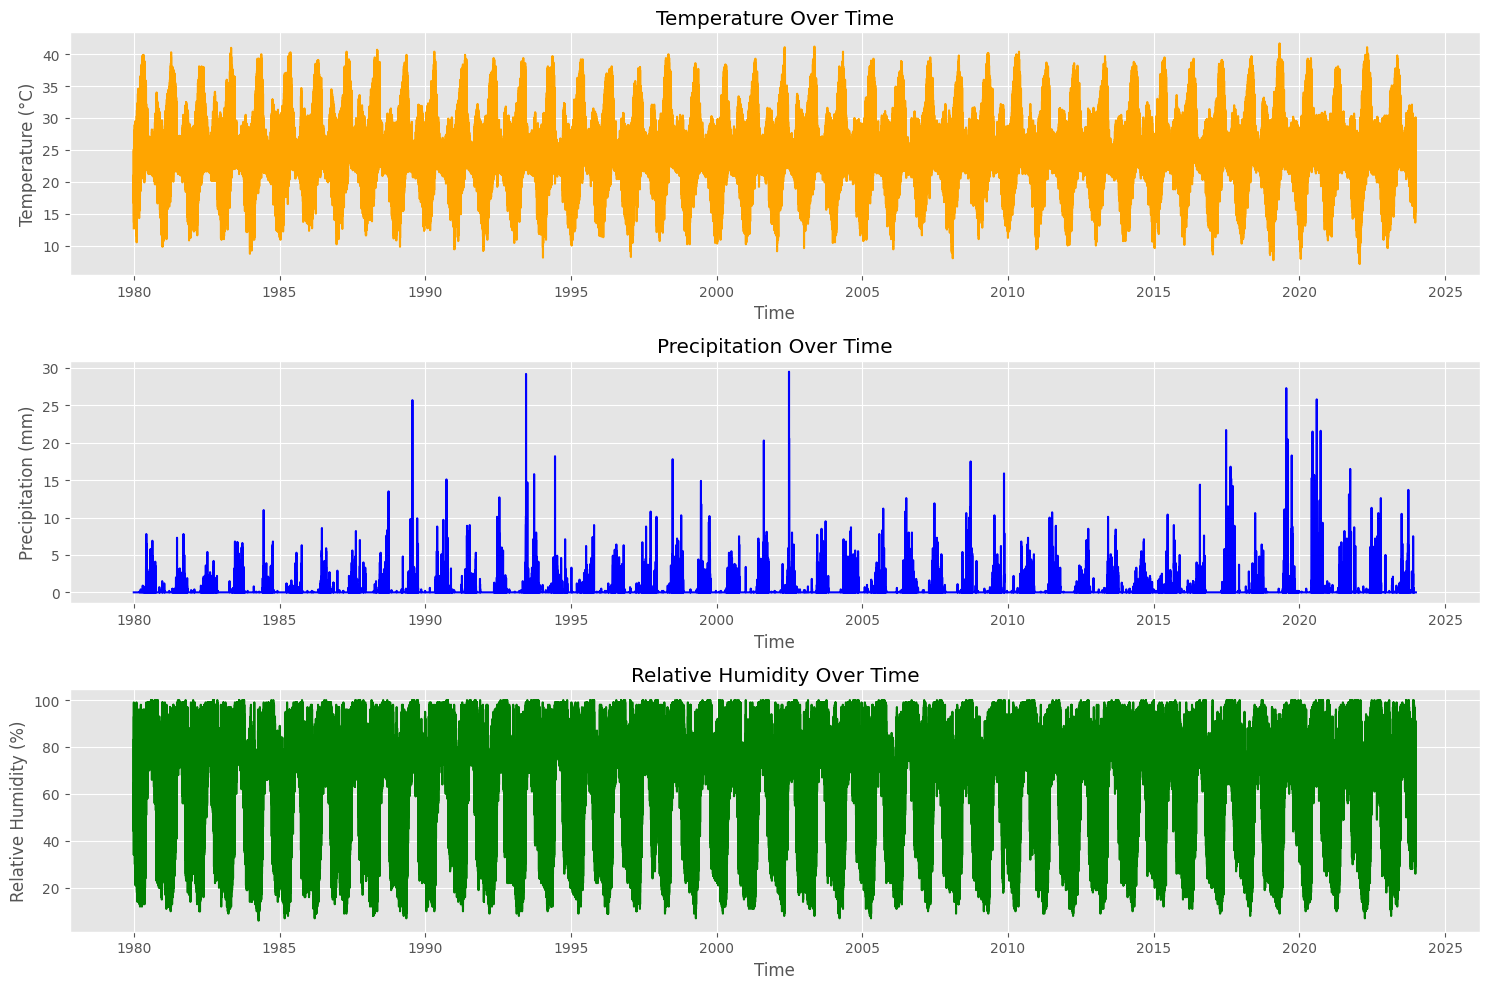

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Plot temperature over time
plt.subplot(3, 1, 1)
plt.plot(weather_data['time'], weather_data['temperature'], color='orange')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

# Plot precipitation over time
plt.subplot(3, 1, 2)
plt.plot(weather_data['time'], weather_data['precipitation (mm)'], color='blue')
plt.title('Precipitation Over Time')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')

# Plot relative humidity over time
plt.subplot(3, 1, 3)
plt.plot(weather_data['time'], weather_data['relative_humidity'], color='green')
plt.title('Relative Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


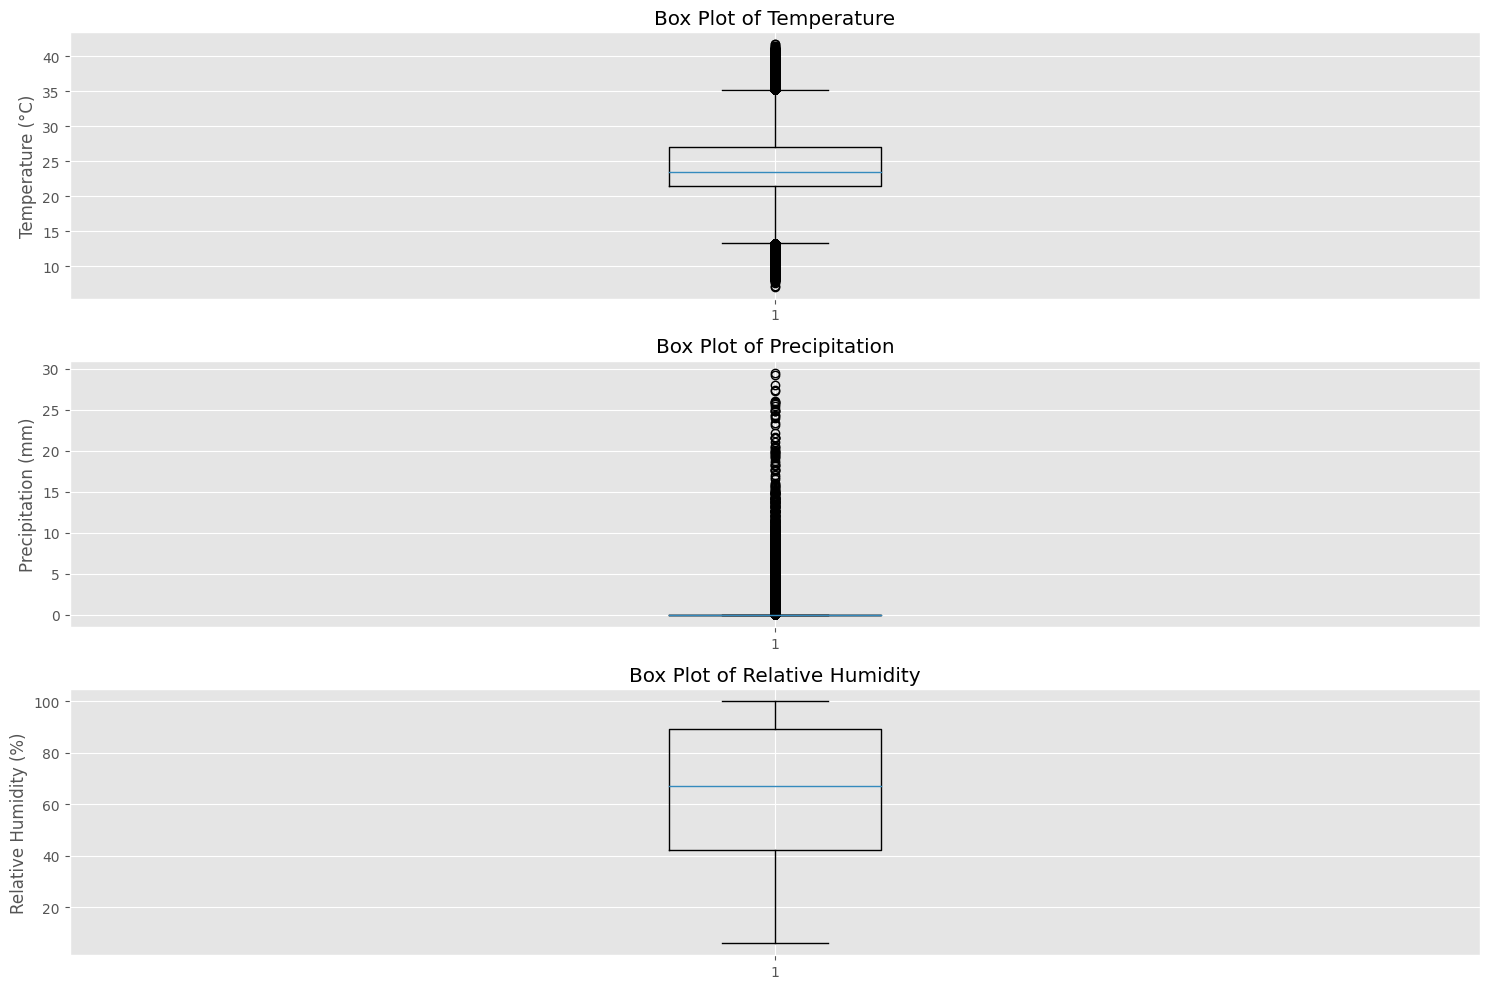

In [5]:
plt.figure(figsize=(15, 10))
#boxplots to see if there the seasonal outliers
plt.subplot(3, 1, 1)
plt.boxplot(weather_data['temperature'])
plt.title('Box Plot of Temperature')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 1, 2)
plt.boxplot(weather_data['precipitation (mm)'])
plt.title('Box Plot of Precipitation')
plt.ylabel('Precipitation (mm)')

plt.subplot(3, 1, 3)
plt.boxplot(weather_data['relative_humidity'])
plt.title('Box Plot of Relative Humidity')
plt.ylabel('Relative Humidity (%)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


This Box Plots suggests occasional Heavy rainfall and Heavy Temperatures 
This may be because of seasonal factors.


In [6]:
#New Time features 
weather_data['year'] = weather_data['time'].dt.year
weather_data['month'] = weather_data['time'].dt.month
weather_data['day'] = weather_data['time'].dt.day
weather_data['hour'] = weather_data['time'].dt.hour
weather_data['day_of_week'] = weather_data['time'].dt.dayofweek

# Display the first few rows to verify the new features
weather_data[['time', 'month', 'day', 'hour', 'day_of_week']].head()


,time,month,day,hour,day_of_week
0,1980-01-01 00:00:00,1,1,0,1
1,1980-01-01 01:00:00,1,1,1,1
2,1980-01-01 02:00:00,1,1,2,1
3,1980-01-01 03:00:00,1,1,3,1
4,1980-01-01 04:00:00,1,1,4,1


# Weather Analysis Monthly

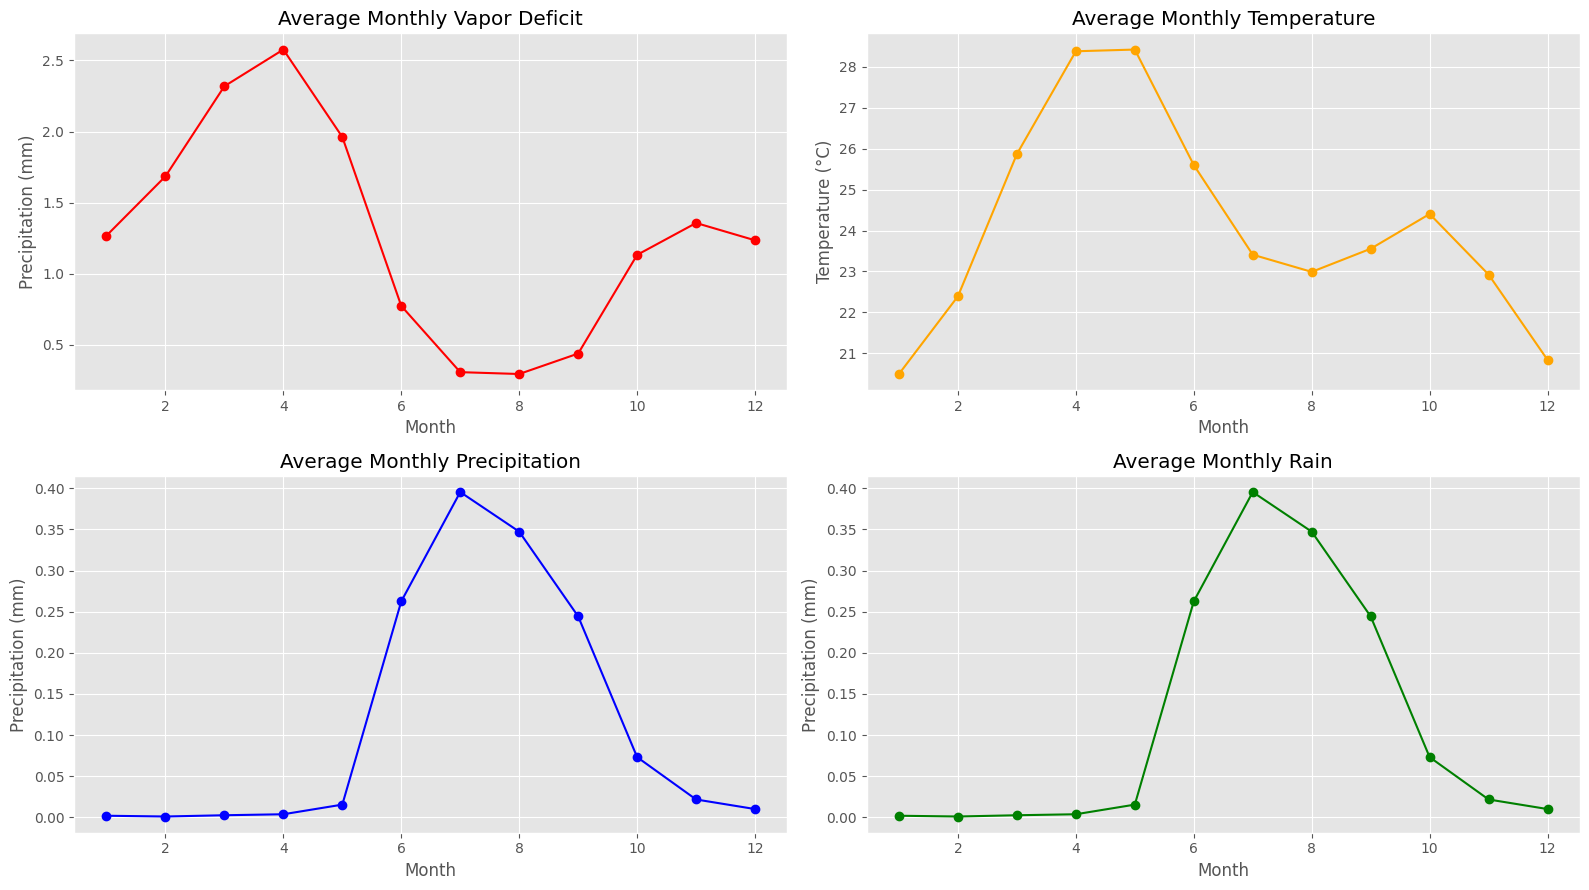

In [7]:
import matplotlib.pyplot as plt

# Calculate the average monthly temperature and precipitation
monthly_avg = weather_data.groupby('month').agg({
    'temperature': 'mean',
    'precipitation (mm)': 'mean',
    'rain (mm)':'mean',
    'vapour_pressure_deficit (kPa)': 'mean'
    
}).reset_index()

# Set the figure size for better visibility
plt.figure(figsize=(16,9 ))

# Plot average monthly vapour deficit
plt.subplot(2, 2, 1)
plt.plot(monthly_avg['month'], monthly_avg['vapour_pressure_deficit (kPa)'], marker='o', color='red')
plt.title('Average Monthly Vapor Deficit')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
# Plot average monthly temperatue
plt.subplot(2, 2, 2)
plt.plot(monthly_avg['month'], monthly_avg['temperature'], marker='o', color='orange')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
#Average monthly precipitation
plt.subplot(2,2,3)
plt.plot(monthly_avg['month'], monthly_avg['precipitation (mm)'], marker='o', color='blue')
plt.title('Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True)

#avarage monthly rain
plt.subplot(2,2,4)
plt.plot(monthly_avg['month'], monthly_avg['rain (mm)'], marker='o', color='green')
plt.title('Average Monthly Rain')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


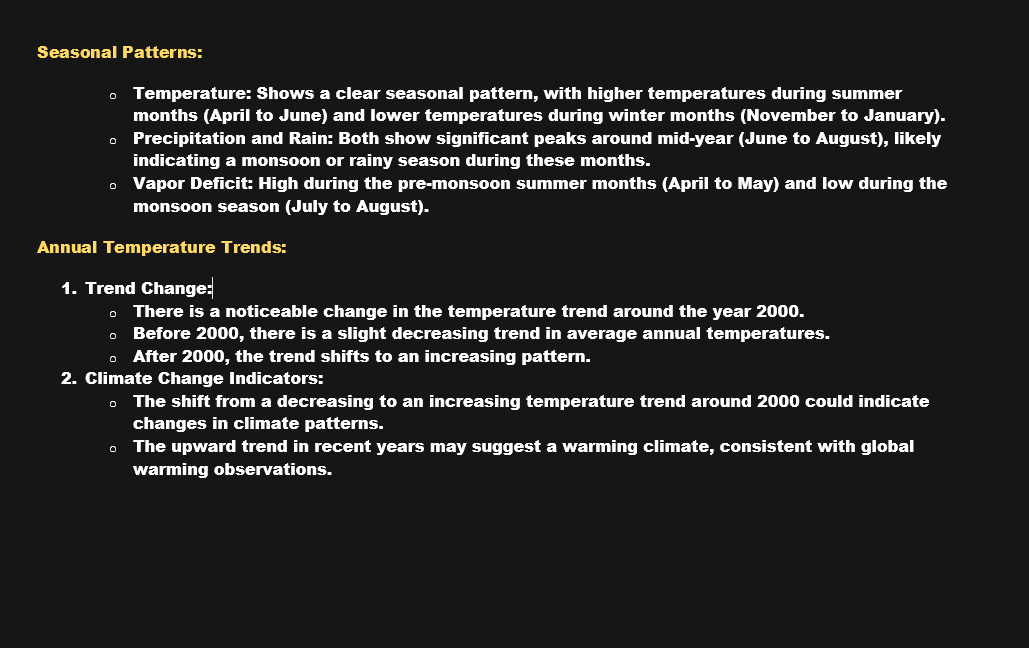

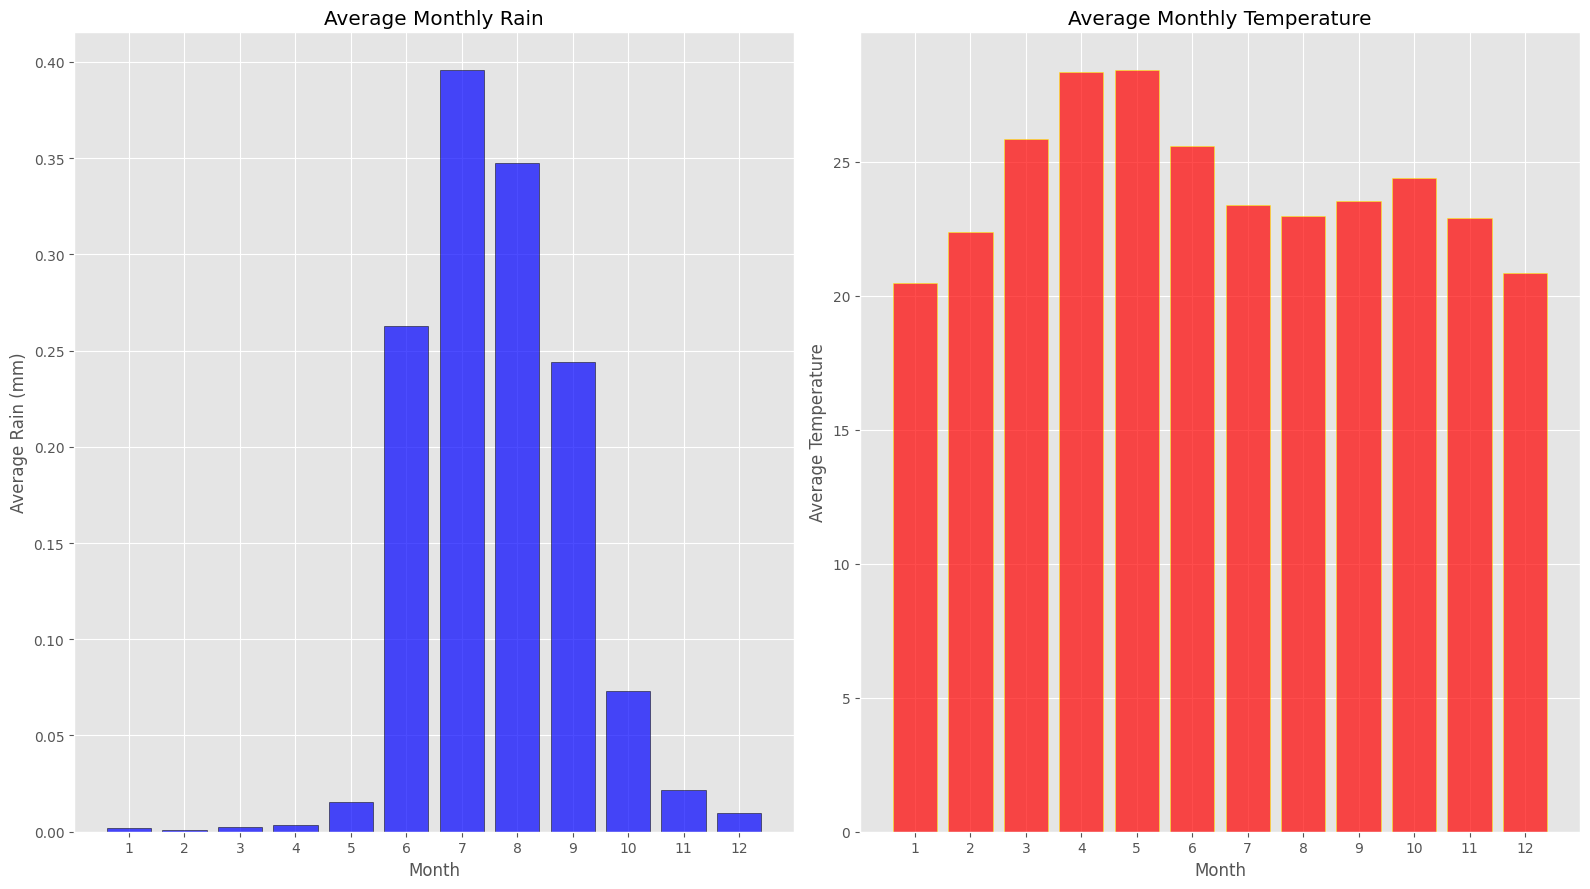

In [8]:
import matplotlib.pyplot as plt

# Assuming monthly_avg DataFrame is already defined with the average monthly data
# Extracting data for the plot
months = monthly_avg['month']
avg_rain = monthly_avg['rain (mm)']
avg_temperature = monthly_avg['temperature']

plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
# Plotting the bar chart
plt.bar(months, avg_rain, color='blue', alpha=0.7, edgecolor='black')
# Adding titles and labels
plt.title('Average Monthly Rain')
plt.xlabel('Month')
plt.ylabel('Average Rain (mm)')
plt.xticks(months)  #

# Display the plot
plt.grid(True)
plt.subplot(1,2,2)
plt.bar(months,avg_temperature,color='Red',alpha = 0.7,edgecolor='yellow')

# Adding titles and labels
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(months)  #
plt.grid(True)
plt.tight_layout()
plt.show()


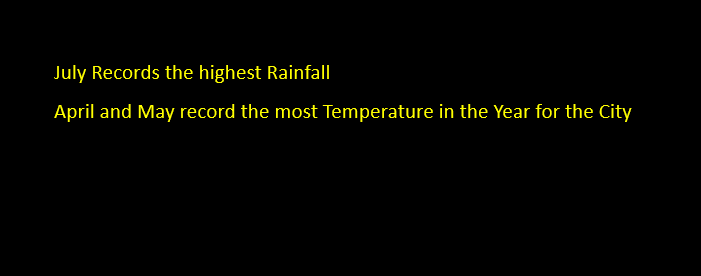

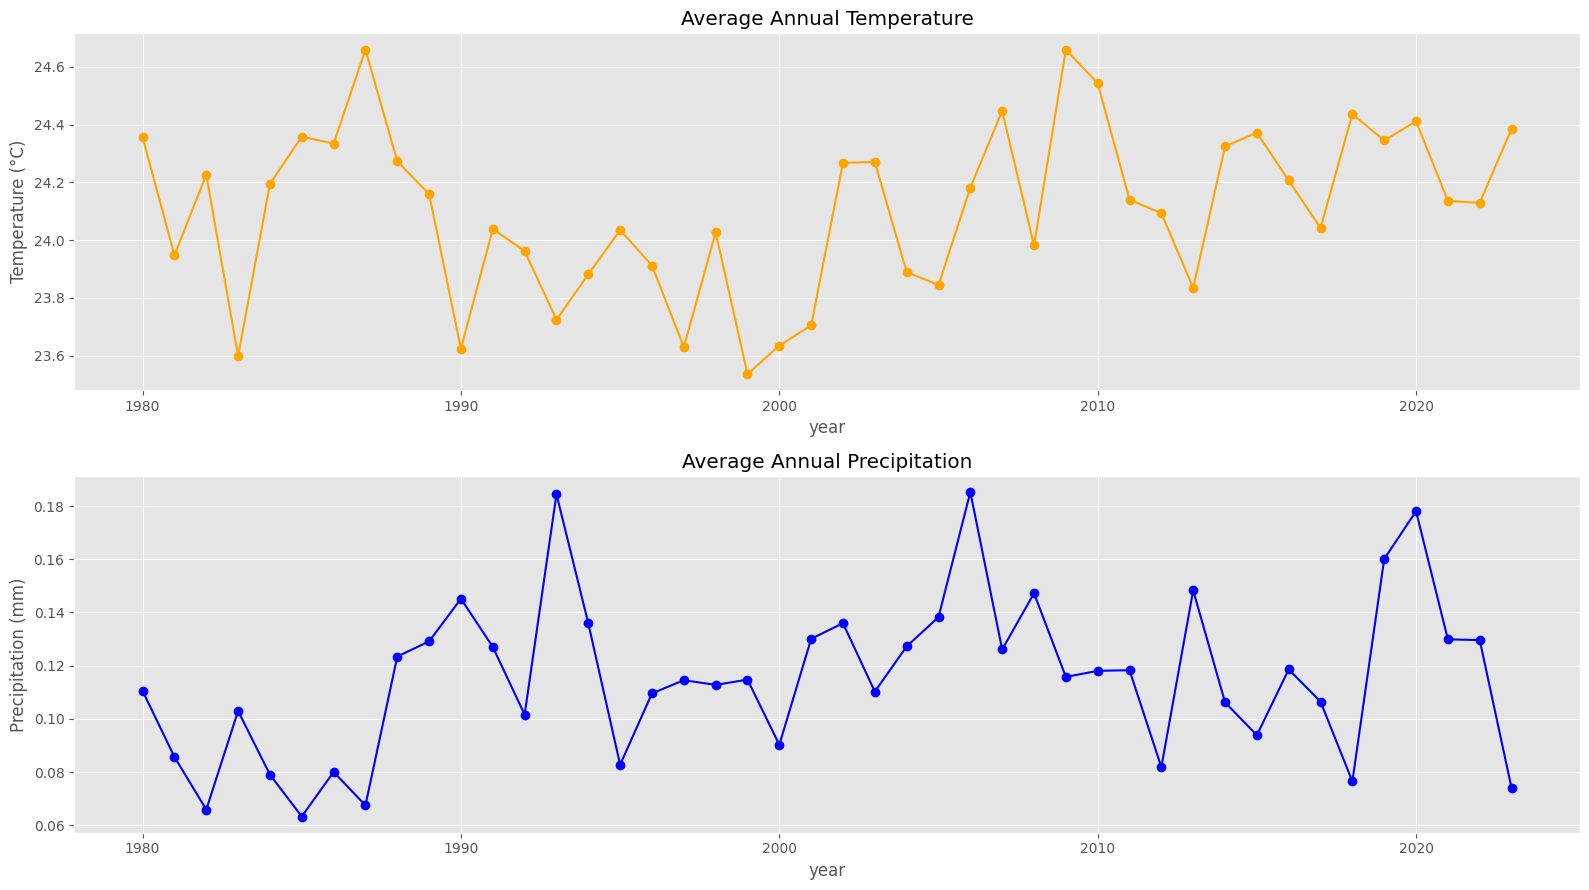

In [9]:
#Temperatue and Rain over the years
yearly_avg = weather_data.groupby('year').agg({
    'temperature': 'mean',
    'precipitation (mm)': 'mean',
    'rain (mm)':'mean',
    'vapour_pressure_deficit (kPa)':'mean'
}).reset_index()
plt.figure(figsize=(16,9))
# Plot average monthly temperature
plt.subplot(2, 1, 1)
plt.plot(yearly_avg['year'], yearly_avg['temperature'], marker='o', color='orange')
plt.title('Average Annual Temperature')
plt.xlabel('year')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Plot average monthly precipitation
plt.subplot(2, 1, 2)
plt.plot(yearly_avg['year'], yearly_avg['precipitation (mm)'], marker='o', color='blue')
plt.title('Average Annual Precipitation')
plt.xlabel('year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

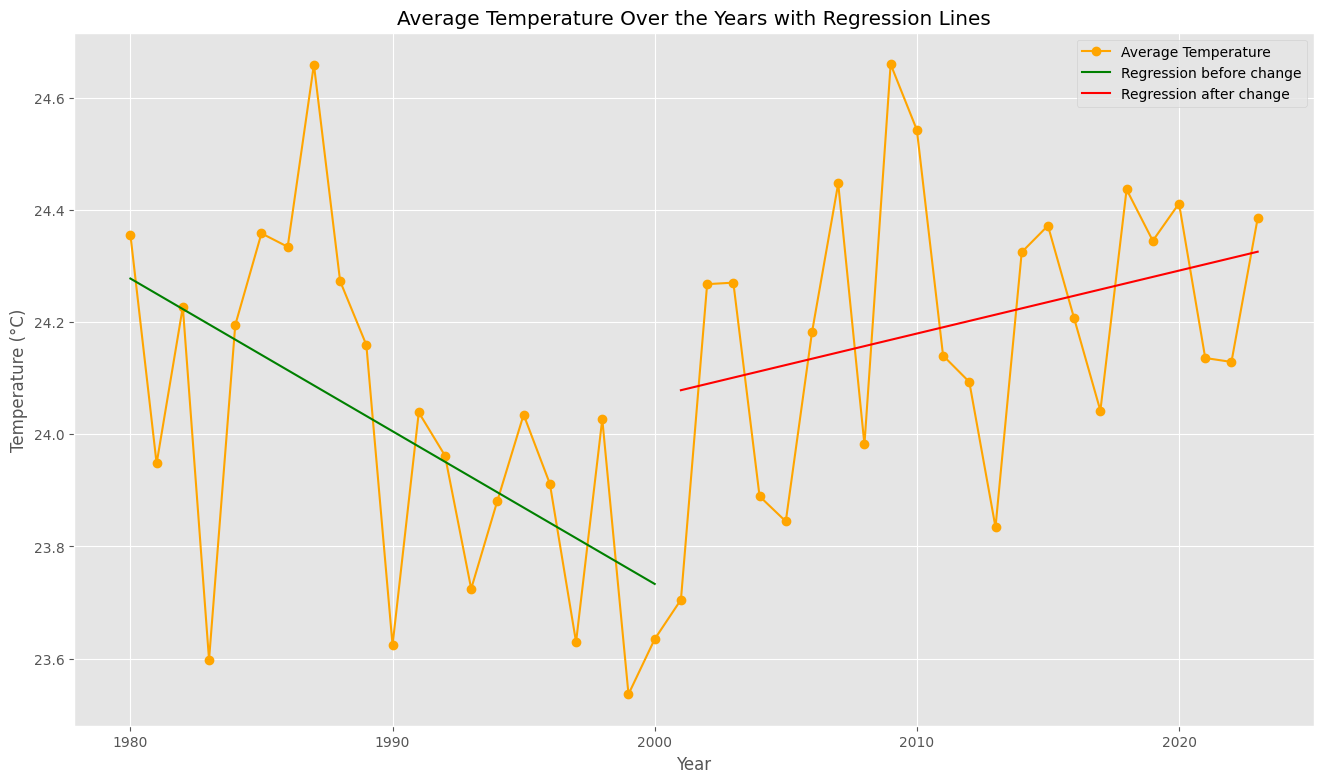

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you have yearly_avg DataFrame with 'year' and 'temperature' columns
plt.figure(figsize=(16,9))
# Scatter plot of average temperature over the years
plt.plot(yearly_avg['year'], yearly_avg['temperature'], label='Average Temperature',marker = 'o', color='orange')
# Fit linear regression model
model = LinearRegression()

# Segment the data into two parts: before and after a change point
change_point_year = 2000  # Change this value based on your data
before_change = yearly_avg[yearly_avg['year'] <= change_point_year]
after_change = yearly_avg[yearly_avg['year'] > change_point_year]

# Fit separate regression lines for each segment
model.fit(before_change[['year']], before_change['temperature'])
plt.plot(before_change['year'], model.predict(before_change[['year']]), color='green', linestyle='-', label='Regression before change')

model.fit(after_change[['year']], after_change['temperature'])
plt.plot(after_change['year'], model.predict(after_change[['year']]), color='red', linestyle='-', label='Regression after change')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature Over the Years with Regression Lines')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


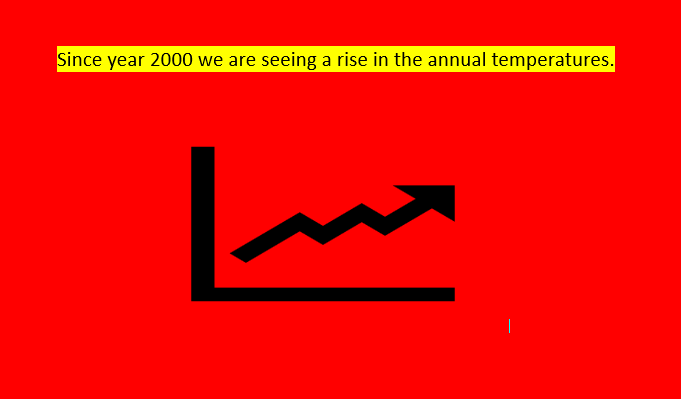

**Since 2000 we are seeing an upward trend in the Average Annual Temperatures.**

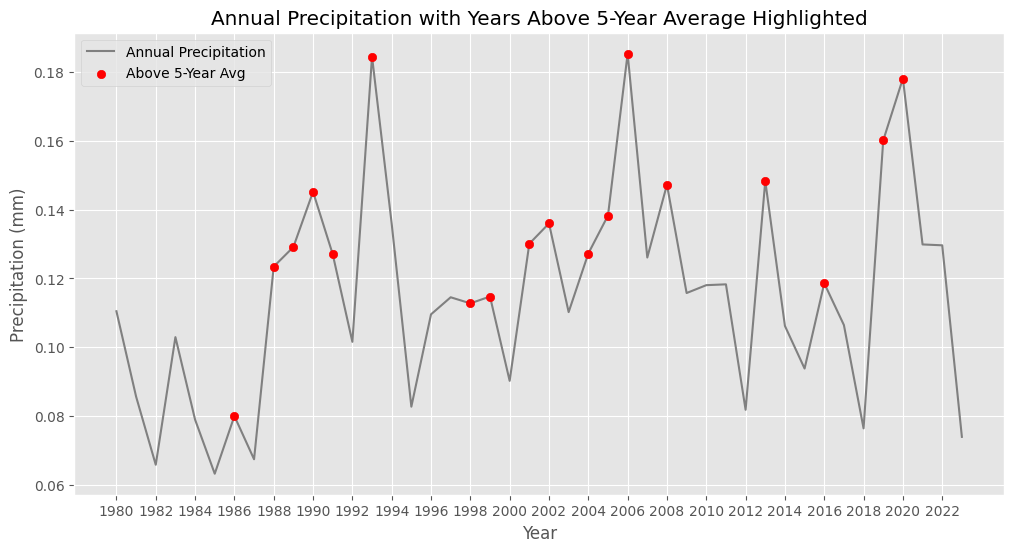

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the rolling average of the past 2 years
yearly_avg['5_year_avg'] = yearly_avg['precipitation (mm)'].rolling(window=5).mean()

# Identify years where precipitation exceeds the 5-year rolling average
peak_data = yearly_avg[yearly_avg['precipitation (mm)'] > yearly_avg['5_year_avg']]

# Plot annual precipitation
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['year'], yearly_avg['precipitation (mm)'], label='Annual Precipitation', color='grey')

# Highlight peak years where precipitation exceeds 5-year average
plt.scatter(peak_data['year'], peak_data['precipitation (mm)'], color='red', label='Above 5-Year Avg', zorder=5)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Annual Precipitation with Years Above 5-Year Average Highlighted')

# Set x-axis ticks at an interval of 2 years
plt.xticks(ticks=range(yearly_avg['year'].min(), yearly_avg['year'].max() + 1, 2))

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


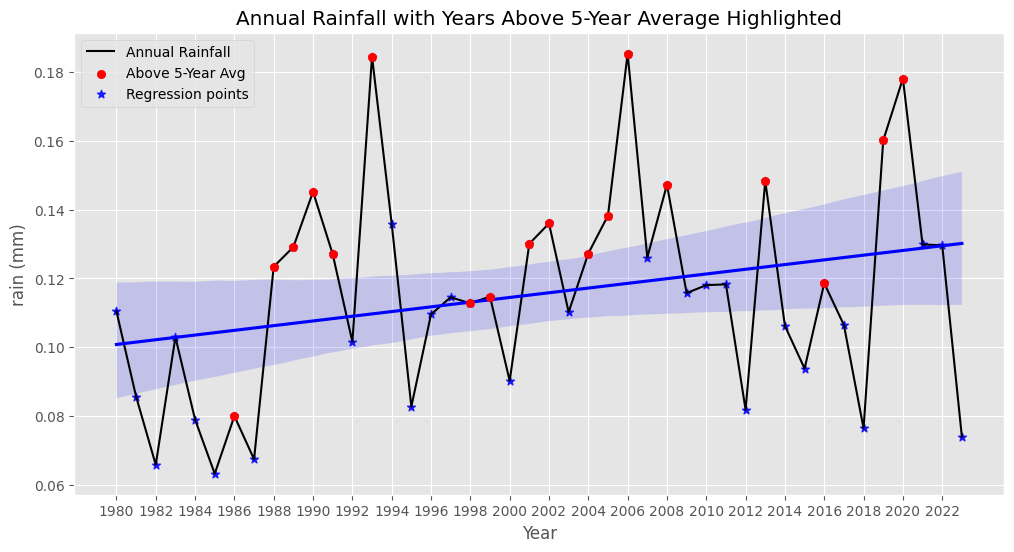

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the rolling average of the past 2 years
yearly_avg['5_year_avg_rain'] = yearly_avg['rain (mm)'].rolling(window=5).mean()

# Identify years where precipitation exceeds the 5-year rolling average
peak_data = yearly_avg[yearly_avg['rain (mm)'] > yearly_avg['5_year_avg_rain']]

# Plot annual precipitation
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['year'], yearly_avg['rain (mm)'], label='Annual Rainfall', color='black')

# Highlight peak years where precipitation exceeds 5-year average
plt.scatter(peak_data['year'], peak_data['rain (mm)'], color='red', label='Above 5-Year Avg', zorder=5)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.title('Annual Rainfall with Years Above 5-Year Average Highlighted')
sns.regplot(x=list(set(weather_data['year'])),y=yearly_avg['rain (mm)'],color='blue',marker='*',label='Regression points')

# Set x-axis ticks at an interval of 2 years
plt.xticks(ticks=range(yearly_avg['year'].min(), yearly_avg['year'].max() + 1, 2))

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


**The area seems to have uneven rainfall with occassional heavy rainfall**

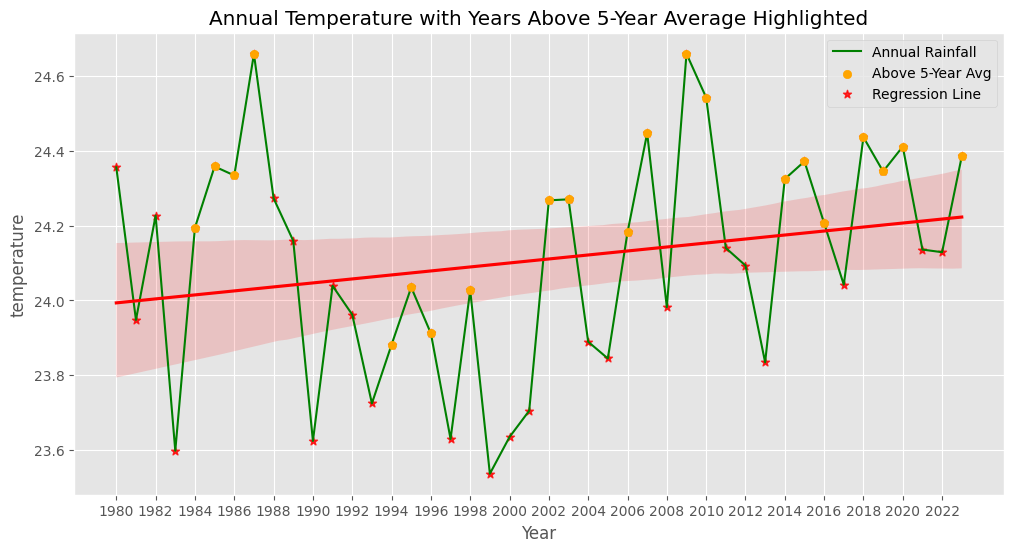

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the rolling average of the past 2 years
yearly_avg['2_year_avg_temp'] = yearly_avg['temperature'].rolling(window=5).mean()

# Identify years where precipitation exceeds the 5-year rolling average
peak_data = yearly_avg[yearly_avg['temperature'] > yearly_avg['2_year_avg_temp']]

# Plot annual precipitation
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['year'], yearly_avg['temperature'], label='Annual Rainfall', color='green')

# Highlighting peak years where precipitation exceeds 5-year average
plt.scatter(peak_data['year'], peak_data['temperature'], color='orange', label='Above 5-Year Avg', zorder=5)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Temperature with Years Above 5-Year Average Highlighted')

# Set x-axis ticks at an interval of 2 years
plt.xticks(ticks=range(yearly_avg['year'].min(), yearly_avg['year'].max() + 1, 2))
sns.regplot(x=list(set(weather_data['year'])),y=yearly_avg['temperature'],color='red',marker="*",fit_reg=True,label='Regression Line')
# Add legend
plt.legend()
# Show plot
plt.grid(True)
plt.show()
